In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv('Datasets\insurance.csv')

<>:1: SyntaxWarning: invalid escape sequence '\i'
<>:1: SyntaxWarning: invalid escape sequence '\i'
C:\Users\bvkir\AppData\Local\Temp\ipykernel_1792\227219896.py:1: SyntaxWarning: invalid escape sequence '\i'
  dataset = pd.read_csv('Datasets\insurance.csv')


In [3]:
dataset.head()

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
onehot = OneHotEncoder(sparse_output=False)
le = LabelEncoder()

In [5]:
one_hot_encoded = onehot.fit_transform(dataset[['sex', 'smoker', 'region']])
onehot.get_feature_names_out()

array(['sex_female', 'sex_male', 'smoker_no', 'smoker_yes',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest'], dtype=object)

In [6]:
one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns= onehot.get_feature_names_out())
one_hot_encoded_df.head()

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [7]:
ohe_dataset = pd.concat([dataset.drop(columns=['sex', 'smoker', 'region'], axis=1), one_hot_encoded_df], axis=1)
ohe_dataset.head()

,index,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,0,19,27.900,0,16884.92400,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1,18,33.770,1,1725.55230,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,2,28,33.000,3,4449.46200,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,3,33,22.705,0,21984.47061,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,4,32,28.880,0,3866.85520,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


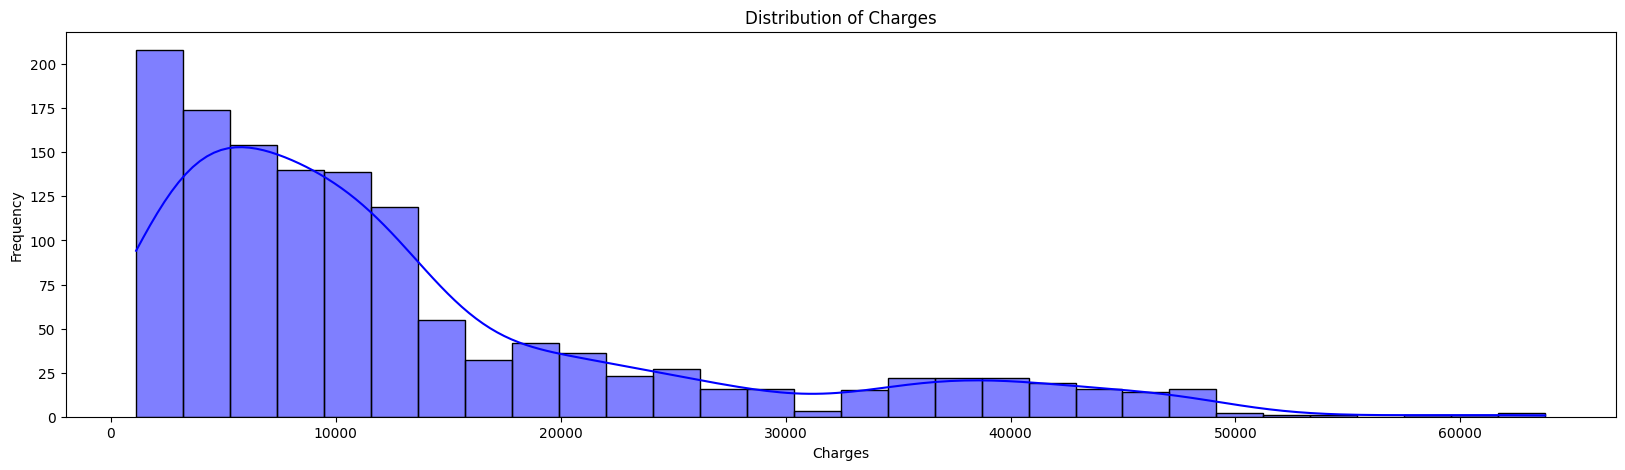

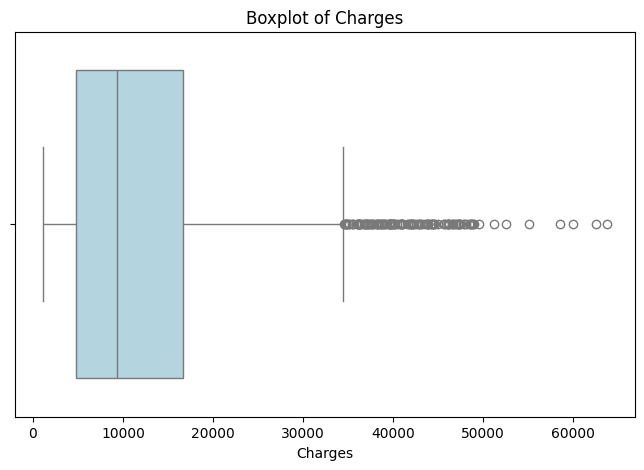

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 5))
sns.histplot(ohe_dataset['charges'], kde=True, bins=30, color='blue')
plt.title('Distribution of Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x=ohe_dataset['charges'], color='lightblue')
plt.title('Boxplot of Charges')
plt.xlabel('Charges')
plt.show()


In [9]:
Q1 = ohe_dataset['charges'].quantile(0.25)
Q3 = ohe_dataset['charges'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = ohe_dataset[(ohe_dataset['charges'] < lower_bound) | (ohe_dataset['charges'] > upper_bound)]
print(f"Number of Outliers: {len(outliers)}")
print(outliers)


Number of Outliers: 139
      index  age     bmi  children      charges  sex_female  sex_male  \
14       14   27  42.130         0  39611.75770         0.0       1.0   
19       19   30  35.300         0  36837.46700         0.0       1.0   
23       23   34  31.920         1  37701.87680         1.0       0.0   
29       29   31  36.300         2  38711.00000         0.0       1.0   
30       30   22  35.600         0  35585.57600         0.0       1.0   
...     ...  ...     ...       ...          ...         ...       ...   
1300   1300   45  30.360         0  62592.87309         0.0       1.0   
1301   1301   62  30.875         3  46718.16325         0.0       1.0   
1303   1303   43  27.800         0  37829.72420         0.0       1.0   
1313   1313   19  34.700         2  36397.57600         1.0       0.0   
1323   1323   42  40.370         2  43896.37630         1.0       0.0   

      smoker_no  smoker_yes  region_northeast  region_northwest  \
14          0.0         1.0     

In [10]:
filtered_ohe_dataset = ohe_dataset[(ohe_dataset['charges'] >= lower_bound) & (ohe_dataset['charges'] <= upper_bound)]
filtered_ohe_dataset.head()

,index,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,0,19,27.900,0,16884.92400,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1,18,33.770,1,1725.55230,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,2,28,33.000,3,4449.46200,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,3,33,22.705,0,21984.47061,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,4,32,28.880,0,3866.85520,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


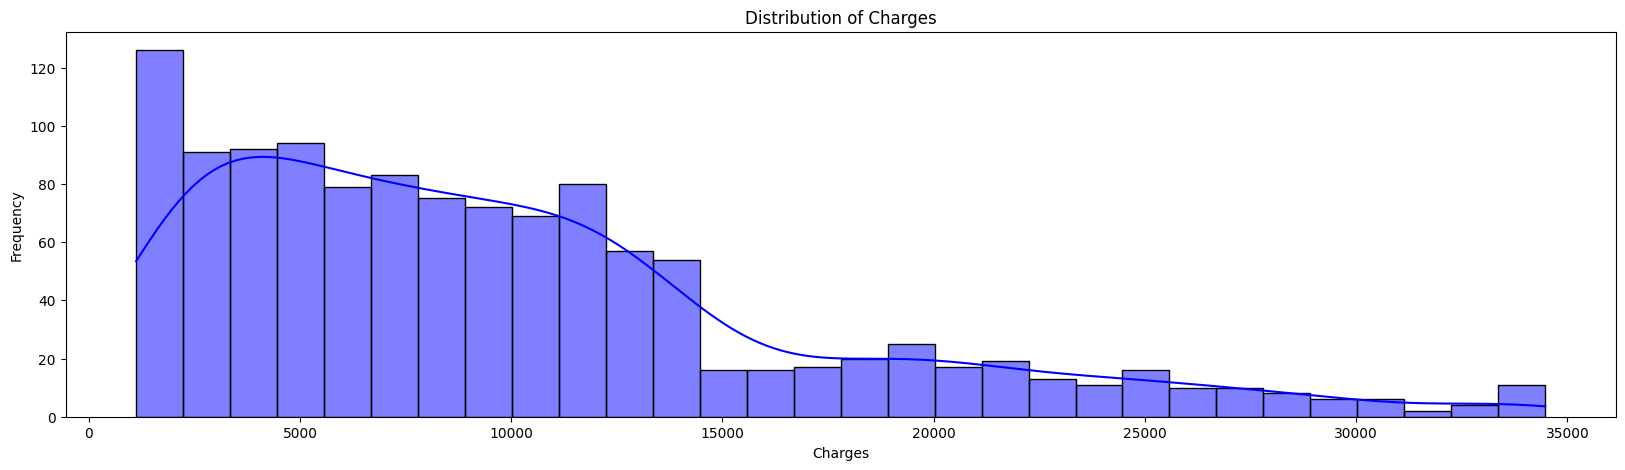

In [11]:
plt.figure(figsize=(20, 5))
sns.histplot(filtered_ohe_dataset['charges'], kde=True, bins=30, color='blue')
plt.title('Distribution of Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

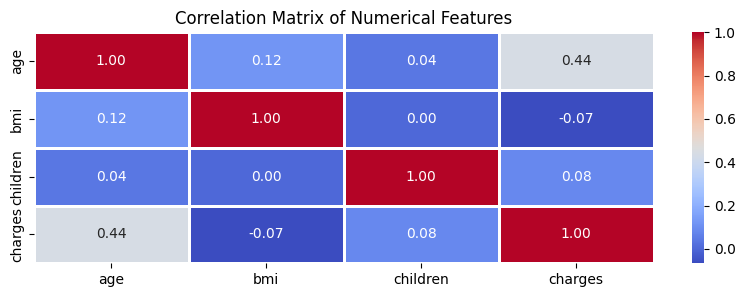

In [12]:
numerical_features = filtered_ohe_dataset[['age', 'bmi', 'children', 'charges']]

corr_matrix = numerical_features.corr()
plt.figure(figsize=(10, 3))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [13]:
# we can remove bmi and children from the dataset since it has weak correlation with charges however I am not removing it 
X = filtered_ohe_dataset.drop(columns=['index', 'charges'], axis=1)
y = filtered_ohe_dataset['charges']

In [14]:
print(X)
print("============================================")
print(y)

      age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
0      19  27.900         0         1.0       0.0        0.0         1.0   
1      18  33.770         1         0.0       1.0        1.0         0.0   
2      28  33.000         3         0.0       1.0        1.0         0.0   
3      33  22.705         0         0.0       1.0        1.0         0.0   
4      32  28.880         0         0.0       1.0        1.0         0.0   
...   ...     ...       ...         ...       ...        ...         ...   
1333   50  30.970         3         0.0       1.0        1.0         0.0   
1334   18  31.920         0         1.0       0.0        1.0         0.0   
1335   18  36.850         0         1.0       0.0        1.0         0.0   
1336   21  25.800         0         1.0       0.0        1.0         0.0   
1337   61  29.070         0         1.0       0.0        0.0         1.0   

      region_northeast  region_northwest  region_southeast  region_southwest  
0       

In [15]:
print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train, X_test = X_train.values, X_test.values
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
from sklearn.linear_model import LinearRegression
ohe_regressor = LinearRegression()
ohe_regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [18]:
X_test_scaled, X_train_scaled

(array([[-1.51137414, -0.29032975, -0.07457655, ..., -0.59059673,
         -0.59220286, -0.56169448],
        [-0.29181699, -0.48858242, -0.07457655, ..., -0.59059673,
         -0.59220286,  1.78032728],
        [-0.72224893, -0.35095247, -0.07457655, ..., -0.59059673,
          1.68861056, -0.56169448],
        ...,
        [-1.43963549, -0.29032975, -0.89663306, ...,  1.69320273,
         -0.59220286, -0.56169448],
        [-1.15268086,  0.54364227, -0.89663306, ..., -0.59059673,
         -0.59220286,  1.78032728],
        [-0.93746489,  0.87460955, -0.89663306, ..., -0.59059673,
          1.68861056, -0.56169448]], shape=(240, 11)),
 array([[-0.00486237, -0.85068029,  1.56953646, ..., -0.59059673,
         -0.59220286, -0.56169448],
        [ 0.71252419,  1.07286223,  1.56953646, ..., -0.59059673,
          1.68861056, -0.56169448],
        [-1.29615817,  1.54145947, -0.89663306, ..., -0.59059673,
          1.68861056, -0.56169448],
        ...,
        [-0.79398758,  1.14986947, -0

In [19]:
y_pred = ohe_regressor.predict(X_test_scaled)

In [20]:
from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y_pred=y_pred, y_true=y_test)
print(f"r2 score: {r2}")
mse = mean_squared_error(y_pred=y_pred, y_true=y_test)
print(f"mse: {mse}")

r2 score: 0.5568176371144351
mse: 27645846.664999332


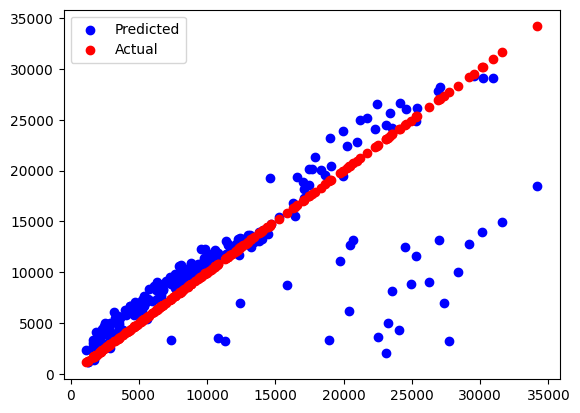

In [21]:
plt.scatter(y_test, y_pred, c='blue', label='Predicted')
plt.scatter(y_test, y_test, c='red', label='Actual')
plt.legend()
plt.show()


In [22]:
from sklearn.linear_model import ElasticNet
elastic=ElasticNet()
elastic.fit(X_train_scaled,y_train)
y_pred_elastic=elastic.predict(X_test_scaled)

In [23]:
r2 = r2_score(y_pred=y_pred_elastic, y_true=y_test)
print(f"r2 score: {r2}")
mse = mean_squared_error(y_pred=y_pred_elastic, y_true=y_test)
print(f"mse: {mse}")

r2 score: 0.5287653945093537
mse: 29395753.8423066


In [24]:
np.log1p(filtered_ohe_dataset['charges'])

0        9.734236
1        7.453882
2        8.400763
3        9.998137
4        8.260455
          ...    
1333     9.268755
1334     7.699381
1335     7.396847
1336     7.605365
1337    10.279948
Name: charges, Length: 1199, dtype: float64

### not getting good metrics we will try with log the charges 

In [25]:
ohe_dataset.head()

,index,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,0,19,27.900,0,16884.92400,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1,18,33.770,1,1725.55230,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,2,28,33.000,3,4449.46200,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,3,33,22.705,0,21984.47061,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,4,32,28.880,0,3866.85520,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [26]:
X, y = ohe_dataset.drop(columns=['index', 'charges'], axis=1).values, np.log1p(ohe_dataset['charges'])
X,y

(array([[19.  , 27.9 ,  0.  , ...,  0.  ,  0.  ,  1.  ],
        [18.  , 33.77,  1.  , ...,  0.  ,  1.  ,  0.  ],
        [28.  , 33.  ,  3.  , ...,  0.  ,  1.  ,  0.  ],
        ...,
        [18.  , 36.85,  0.  , ...,  0.  ,  1.  ,  0.  ],
        [21.  , 25.8 ,  0.  , ...,  0.  ,  0.  ,  1.  ],
        [61.  , 29.07,  0.  , ...,  1.  ,  0.  ,  0.  ]], shape=(1338, 11)),
 0        9.734236
 1        7.453882
 2        8.400763
 3        9.998137
 4        8.260455
           ...    
 1333     9.268755
 1334     7.699381
 1335     7.396847
 1336     7.605365
 1337    10.279948
 Name: charges, Length: 1338, dtype: float64)

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
X_test_scaled, X_train_scaled

(array([[ 0.41103487, -0.8954835 ,  0.73518223, ..., -0.56912549,
         -0.59380229, -0.55760593],
        [-0.22651949, -0.08703981, -0.91501097, ...,  1.75708174,
         -0.59380229, -0.55760593],
        [ 1.75698298, -0.61015044, -0.91501097, ...,  1.75708174,
         -0.59380229, -0.55760593],
        ...,
        [-1.50162823, -0.38822472, -0.91501097, ..., -0.56912549,
         -0.59380229, -0.55760593],
        [ 1.33194673,  0.92414053, -0.91501097, ..., -0.56912549,
          1.68406222, -0.55760593],
        [-1.35994948, -1.42526858, -0.08991437, ..., -0.56912549,
         -0.59380229,  1.79338122]], shape=(402, 11)),
 array([[ 1.54446486,  0.10318223, -0.91501097, ...,  1.75708174,
         -0.59380229, -0.55760593],
        [ 0.48187425, -0.4908445 , -0.91501097, ..., -0.56912549,
         -0.59380229,  1.79338122],
        [ 1.04858924,  0.2266597 ,  1.56027883, ..., -0.56912549,
          1.68406222, -0.55760593],
        ...,
        [ 1.33194673, -0.8954835 , -0

In [29]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [30]:
y_pred_log = regressor.predict(X_test_scaled)

In [31]:
from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y_pred=y_pred_log, y_true=y_test)
print(f"r2 score: {r2}")
mse = mean_squared_error(y_pred=y_pred_log, y_true=y_test)
print(f"mse: {mse}")

r2 score: 0.7844706205006358
mse: 0.18042803518857703


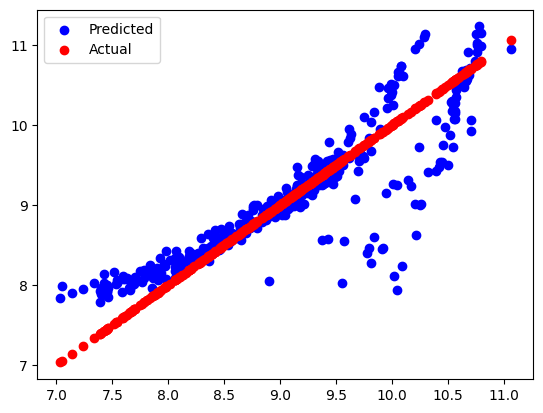

In [32]:
plt.scatter(y_test, y_pred_log, c='blue', label='Predicted')
plt.scatter(y_test, y_test, c='red', label='Actual')
plt.legend()
plt.show()


In [33]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
X_poly

array([[ 1.  , 19.  , 27.9 , ...,  0.  ,  0.  ,  1.  ],
       [ 1.  , 18.  , 33.77, ...,  1.  ,  0.  ,  0.  ],
       [ 1.  , 28.  , 33.  , ...,  1.  ,  0.  ,  0.  ],
       ...,
       [ 1.  , 18.  , 36.85, ...,  1.  ,  0.  ,  0.  ],
       [ 1.  , 21.  , 25.8 , ...,  0.  ,  0.  ,  1.  ],
       [ 1.  , 61.  , 29.07, ...,  0.  ,  0.  ,  0.  ]], shape=(1338, 78))

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
poly_regressor = LinearRegression()
poly_regressor.fit(X_train_scaled, y_train)
poly_y_pred = poly_regressor.predict(X_test_scaled)

In [36]:
from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y_pred=poly_y_pred, y_true=y_test)
print(f"r2 score: {r2}")
mse = mean_squared_error(y_pred=poly_y_pred, y_true=y_test)
print(f"mse: {mse}")

r2 score: 0.8420695136062979
mse: 0.13220975916406802


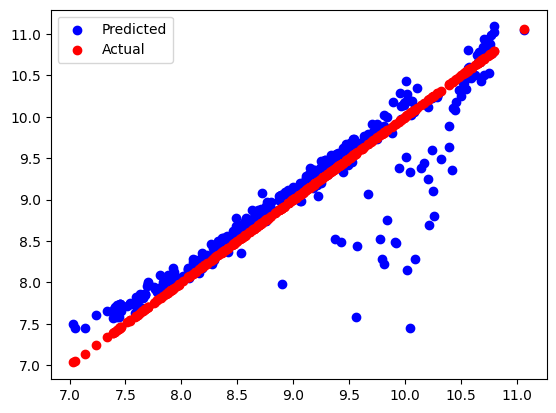

In [37]:
plt.scatter(y_test, poly_y_pred, c='blue', label='Predicted')
plt.scatter(y_test, y_test, c='red', label='Actual')
plt.legend()
plt.show()


# Now lets do with labelencoder for the categorical varible region

In [38]:
dataset.head()

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520


In [39]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
ohe = OneHotEncoder(sparse_output=False)
ohe_feature_names = ['smoker', 'sex']
le_array =  le.fit_transform(dataset['region'])
le_dataset = dataset
le_dataset['region'] = le_array
le_dataset

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,3,16884.92400
1,1,18,male,33.770,1,no,2,1725.55230
2,2,28,male,33.000,3,no,2,4449.46200
3,3,33,male,22.705,0,no,1,21984.47061
4,4,32,male,28.880,0,no,1,3866.85520
...,...,...,...,...,...,...,...,...
1333,1333,50,male,30.970,3,no,1,10600.54830
1334,1334,18,female,31.920,0,no,0,2205.98080
1335,1335,18,female,36.850,0,no,2,1629.83350
1336,1336,21,female,25.800,0,no,3,2007.94500


In [40]:
ohe_arrays = ohe.fit_transform(le_dataset[ohe_feature_names])
final_dataset = pd.concat([le_dataset.drop(columns=['index', 'smoker', 'sex'], axis=1), pd.DataFrame(ohe_arrays, columns= ohe.get_feature_names_out())], axis=1)
final_dataset


,age,bmi,children,region,charges,smoker_no,smoker_yes,sex_female,sex_male
0,19,27.900,0,3,16884.92400,0.0,1.0,1.0,0.0
1,18,33.770,1,2,1725.55230,1.0,0.0,0.0,1.0
2,28,33.000,3,2,4449.46200,1.0,0.0,0.0,1.0
3,33,22.705,0,1,21984.47061,1.0,0.0,0.0,1.0
4,32,28.880,0,1,3866.85520,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,1,10600.54830,1.0,0.0,0.0,1.0
1334,18,31.920,0,0,2205.98080,1.0,0.0,1.0,0.0
1335,18,36.850,0,2,1629.83350,1.0,0.0,1.0,0.0
1336,21,25.800,0,3,2007.94500,1.0,0.0,1.0,0.0


In [41]:
X,y = final_dataset.drop(columns=['charges']).values, np.log1p(final_dataset['charges']).values
X,y

(array([[19.  , 27.9 ,  0.  , ...,  1.  ,  1.  ,  0.  ],
        [18.  , 33.77,  1.  , ...,  0.  ,  0.  ,  1.  ],
        [28.  , 33.  ,  3.  , ...,  0.  ,  0.  ,  1.  ],
        ...,
        [18.  , 36.85,  0.  , ...,  0.  ,  1.  ,  0.  ],
        [21.  , 25.8 ,  0.  , ...,  0.  ,  1.  ,  0.  ],
        [61.  , 29.07,  0.  , ...,  1.  ,  1.  ,  0.  ]], shape=(1338, 8)),
 array([ 9.73423565,  7.45388181,  8.40076319, ...,  7.39684651,
         7.60536499, 10.27994808], shape=(1338,)))

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
le_scaler = StandardScaler()
X_train_scaled = le_scaler.fit_transform(X_train)
X_test_scaled = le_scaler.transform(X_test)
X_train_scaled, X_test_scaled

(array([[ 1.54446486,  0.10318223, -0.91501097, ..., -0.51298918,
          1.02597835, -1.02597835],
        [ 0.48187425, -0.4908445 , -0.91501097, ..., -0.51298918,
         -0.97467943,  0.97467943],
        [ 1.04858924,  0.2266597 ,  1.56027883, ..., -0.51298918,
          1.02597835, -1.02597835],
        ...,
        [ 1.33194673, -0.8954835 , -0.91501097, ..., -0.51298918,
         -0.97467943,  0.97467943],
        [-0.15568012,  2.84638435,  0.73518223, ...,  1.94935887,
          1.02597835, -1.02597835],
        [ 1.11942861, -0.10706319, -0.91501097, ..., -0.51298918,
         -0.97467943,  0.97467943]], shape=(936, 8)),
 array([[ 0.41103487, -0.8954835 ,  0.73518223, ..., -0.51298918,
          1.02597835, -1.02597835],
        [-0.22651949, -0.08703981, -0.91501097, ..., -0.51298918,
          1.02597835, -1.02597835],
        [ 1.75698298, -0.61015044, -0.91501097, ...,  1.94935887,
          1.02597835, -1.02597835],
        ...,
        [-1.50162823, -0.38822472, -0.

In [43]:
le_regressor = LinearRegression()
le_regressor.fit(X_train_scaled, y_train)
le_y_pred = le_regressor.predict(X_test_scaled)

In [44]:
from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y_pred=le_y_pred, y_true=y_test)
print(f"r2 score: {r2}")
mse = mean_squared_error(y_pred=le_y_pred, y_true=y_test)
print(f"mse: {mse}")

r2 score: 0.7838118028638543
mse: 0.18097955708330968


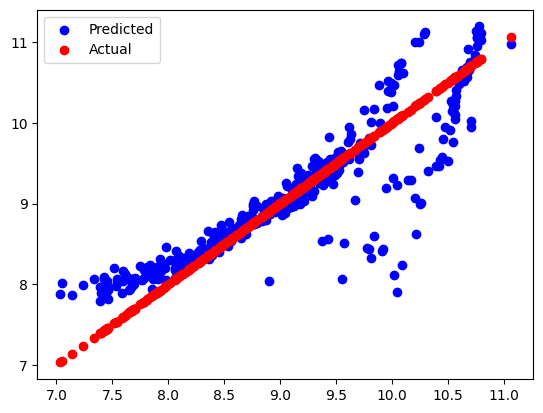

In [45]:
plt.scatter(y_test, le_y_pred, c='blue', label='Predicted')
plt.scatter(y_test, y_test, c='red', label='Actual')
plt.legend()
plt.show()


In [46]:
X_train, X_test

(array([[61.   , 31.16 ,  0.   , ...,  0.   ,  1.   ,  0.   ],
        [46.   , 27.6  ,  0.   , ...,  0.   ,  0.   ,  1.   ],
        [54.   , 31.9  ,  3.   , ...,  0.   ,  1.   ,  0.   ],
        ...,
        [58.   , 25.175,  0.   , ...,  0.   ,  0.   ,  1.   ],
        [37.   , 47.6  ,  2.   , ...,  1.   ,  1.   ,  0.   ],
        [55.   , 29.9  ,  0.   , ...,  0.   ,  0.   ,  1.   ]],
       shape=(936, 8)),
 array([[45.   , 25.175,  2.   , ...,  0.   ,  1.   ,  0.   ],
        [36.   , 30.02 ,  0.   , ...,  0.   ,  1.   ,  0.   ],
        [64.   , 26.885,  0.   , ...,  1.   ,  1.   ,  0.   ],
        ...,
        [18.   , 28.215,  0.   , ...,  0.   ,  1.   ,  0.   ],
        [58.   , 36.08 ,  0.   , ...,  0.   ,  0.   ,  1.   ],
        [20.   , 22.   ,  1.   , ...,  0.   ,  0.   ,  1.   ]],
       shape=(402, 8)))

In [47]:
from sklearn.preprocessing import PolynomialFeatures
le_X_poly = PolynomialFeatures(degree=2)
X_train, X_test = le_X_poly.fit_transform(X_train), le_X_poly.transform(X_test)
X_train, X_test

(array([[ 1.   , 61.   , 31.16 , ...,  1.   ,  0.   ,  0.   ],
        [ 1.   , 46.   , 27.6  , ...,  0.   ,  0.   ,  1.   ],
        [ 1.   , 54.   , 31.9  , ...,  1.   ,  0.   ,  0.   ],
        ...,
        [ 1.   , 58.   , 25.175, ...,  0.   ,  0.   ,  1.   ],
        [ 1.   , 37.   , 47.6  , ...,  1.   ,  0.   ,  0.   ],
        [ 1.   , 55.   , 29.9  , ...,  0.   ,  0.   ,  1.   ]],
       shape=(936, 45)),
 array([[ 1.   , 45.   , 25.175, ...,  1.   ,  0.   ,  0.   ],
        [ 1.   , 36.   , 30.02 , ...,  1.   ,  0.   ,  0.   ],
        [ 1.   , 64.   , 26.885, ...,  1.   ,  0.   ,  0.   ],
        ...,
        [ 1.   , 18.   , 28.215, ...,  1.   ,  0.   ,  0.   ],
        [ 1.   , 58.   , 36.08 , ...,  0.   ,  0.   ,  1.   ],
        [ 1.   , 20.   , 22.   , ...,  0.   ,  0.   ,  1.   ]],
       shape=(402, 45)))

In [48]:
le_poly_scaler = StandardScaler()
X_train_scaled, X_test_scaled = le_poly_scaler.fit_transform(X_train), le_poly_scaler.transform(X_test)
X_train_scaled, X_test_scaled

(array([[ 0.        ,  1.54446486,  0.10318223, ...,  1.02597835,
          0.        , -1.02597835],
        [ 0.        ,  0.48187425, -0.4908445 , ..., -0.97467943,
          0.        ,  0.97467943],
        [ 0.        ,  1.04858924,  0.2266597 , ...,  1.02597835,
          0.        , -1.02597835],
        ...,
        [ 0.        ,  1.33194673, -0.8954835 , ..., -0.97467943,
          0.        ,  0.97467943],
        [ 0.        , -0.15568012,  2.84638435, ...,  1.02597835,
          0.        , -1.02597835],
        [ 0.        ,  1.11942861, -0.10706319, ..., -0.97467943,
          0.        ,  0.97467943]], shape=(936, 45)),
 array([[ 0.        ,  0.41103487, -0.8954835 , ...,  1.02597835,
          0.        , -1.02597835],
        [ 0.        , -0.22651949, -0.08703981, ...,  1.02597835,
          0.        , -1.02597835],
        [ 0.        ,  1.75698298, -0.61015044, ...,  1.02597835,
          0.        , -1.02597835],
        ...,
        [ 0.        , -1.50162823, -0

In [49]:
le_poly_regressor = LinearRegression()
le_poly_regressor.fit(X_train_scaled, y_train)
le_poly_y_pred = le_poly_regressor.predict(X_test_scaled)

In [50]:
from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y_pred=le_poly_y_pred, y_true=y_test)
print(f"r2 score: {r2}")
mse = mean_squared_error(y_pred=le_poly_y_pred, y_true=y_test)
print(f"mse: {mse}")

r2 score: 0.8457482457234614
mse: 0.12913014927781175


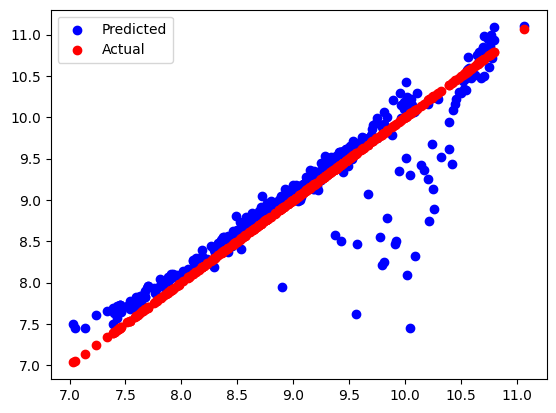

In [51]:
plt.scatter(y_test, le_poly_y_pred, c='blue', label='Predicted')
plt.scatter(y_test, y_test, c='red', label='Actual')
plt.legend()
plt.show()
